In [209]:
import janitor
import skimpy as sk
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
trans = pd.read_excel("C:\\Users\\Prime\\Music\\Projects(Forage)\\Quantium Customer Segments Proj\\QVI_transaction_data.xlsx")

trans = trans.clean_names()

trans.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [211]:
pb = pd.read_csv("C:\\Users\\Prime\\Music\\Projects(Forage)\\Quantium Customer Segments Proj\\QVI_purchase_behaviour.csv")

pb = pb.clean_names()

pb.head()

,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [212]:
# Convert Excel serial date to proper datetime
trans['date'] = pd.to_datetime(trans['date'], unit='D', origin='1899-12-30')

In [213]:
sk.skim(trans)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 264836 │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ store_nbr        │   0 │     0 │   135.1 │   76.78 │     1 │     70 │     130 │     203 │     272 │ ▇▇▇▇▇▇ │  │
│ │ lylty_card_nbr   │   0 │     0 │  135500 │   80580 │  1000 │  70020 │  130400 │  203100 │ 2374000 │   ▇    │  │
│ │ txn_id           │   0 │     0 │  135200 │   78130 │     1 │  67600 │  135100 │  202700 │ 2416000 │   ▇    │  │
│ │ prod_nbr         │   0 │     0 │   56.58 │   32.83 │     1 │     28 │      56 │      85 │     114 │ ▇▇▇▇▇▇ │  │
│ │ prod_qty         │   0 │     0 │   1.907 │  0.6437 │     1 │      2 │       2 │       2 │     200 │   ▇    │  │
│ │ tot_sales        │   0 │     0 │   7.304 │   3.083 │   1.5 │    5.4 │     7.4 │     9.2 │     650 │   ▇    │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column         ┃ NA     ┃ NA %       ┃ first                 ┃ last                  ┃ frequency           ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date           │      0 │          0 │      2018-07-01       │      2019-06-30       │ None                │  │
│ └────────────────┴────────┴────────────┴───────────────────────┴───────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ prod_name │  0 │    0 │ CCs       │ Kettle    │ Burger    │ Woolworth │      33.5 │         7 │    1863922 │  │
│ │           │    │      │ Original  │ Tortilla  │ Rings     │ s Mild    │           │           │            │  │
│ │           │    │      │ 175g      │ ChpsHny&J │ 220g

In [214]:
sk.skim(pb)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 72637  │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ lylty_card_nbr    │   0 │     0 │  136200 │  89890 │  1000 │  66200 │  134000 │  203400 │ 2374000 │   ▇    │  │
│ └───────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ lifestage │  0 │    0 │ RETIREES │ MIDAGE    │ MIDAGE    │ YOUNG     │       16.3 │       1.8 │     130469 │  │
│ │           │    │      │          │ SINGLES/C │ SINGLES/C │ SINGLES/C │            │           │            │  │
│ │           │    │      │          │ OUPLES    │ OUPLES    │ OUPLES    │            │           │            │  │
│ │ premium_c │  0 │    0 │ Budget   │ Mainstrea │ Budget    │ Premium   │       7.87 │         1 │      72637 │  │
│ │ ustomer   │    │      │          │ m         │           │           │            │           │            │  │
│ └───────────┴────┴──────┴──────────┴───────────┴───────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [215]:
con = db.connect()

con.query("Create table tr as Select * from trans")

In [216]:
con.query("""--Add a new column for size (if not already added)
ALTER TABLE tr ADD COLUMN size INTEGER;

-- Extract size in grams (e.g., "250g") and update size column
UPDATE tr
SET size = CAST(REGEXP_EXTRACT(LOWER(prod_name), '([0-9]{2,3})') AS INTEGER);

-- Clean the product name by removing the size (e.g., "250g") and trimming whitespace
UPDATE tr
SET prod_name = TRIM(REGEXP_REPLACE(prod_name, '([0-9]{2,3})g', ''));
""")

In [217]:
con.query("""
CREATE OR REPLACE TABLE tr AS
SELECT
    trans.date,
    trans.store_nbr,
    trans.lylty_card_nbr,
    trans.txn_id,
    trans.prod_nbr,
    
    -- Cleaned product name (removing size like '250g')
    TRIM(REGEXP_REPLACE(trans.prod_name, '([0-9]{2,3})g', '')) AS prod_name,
    
    -- Extracted numeric size (like 250 from '250g')
    CAST(REGEXP_EXTRACT(LOWER(trans.prod_name), '([0-9]{2,3})') AS INTEGER) AS size,
    trans.prod_qty,
    trans.tot_sales,
    pb.lifestage,
    pb.premium_customer,
    

FROM trans
JOIN pb ON trans.lylty_card_nbr = pb.lylty_card_nbr;
""")

In [218]:
con.query("Select * from tr order by tot_sales desc limit 2").df()


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,size,prod_qty,tot_sales,lifestage,premium_customer
0,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium
1,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium


In [219]:
con.query("Delete from tr where tot_sales = 650.0")

In [220]:
overview = con.query("""
SELECT 
    premium_customer,
    lifestage,
    size,
    ROUND(SUM(tot_sales), 2) AS revenue,
    COUNT(txn_id) AS volume,
    DATE_TRUNC('month', date) AS time
FROM tr
GROUP BY DATE_TRUNC('month', date), size,premium_customer,lifestage
ORDER BY time, size
""").df()


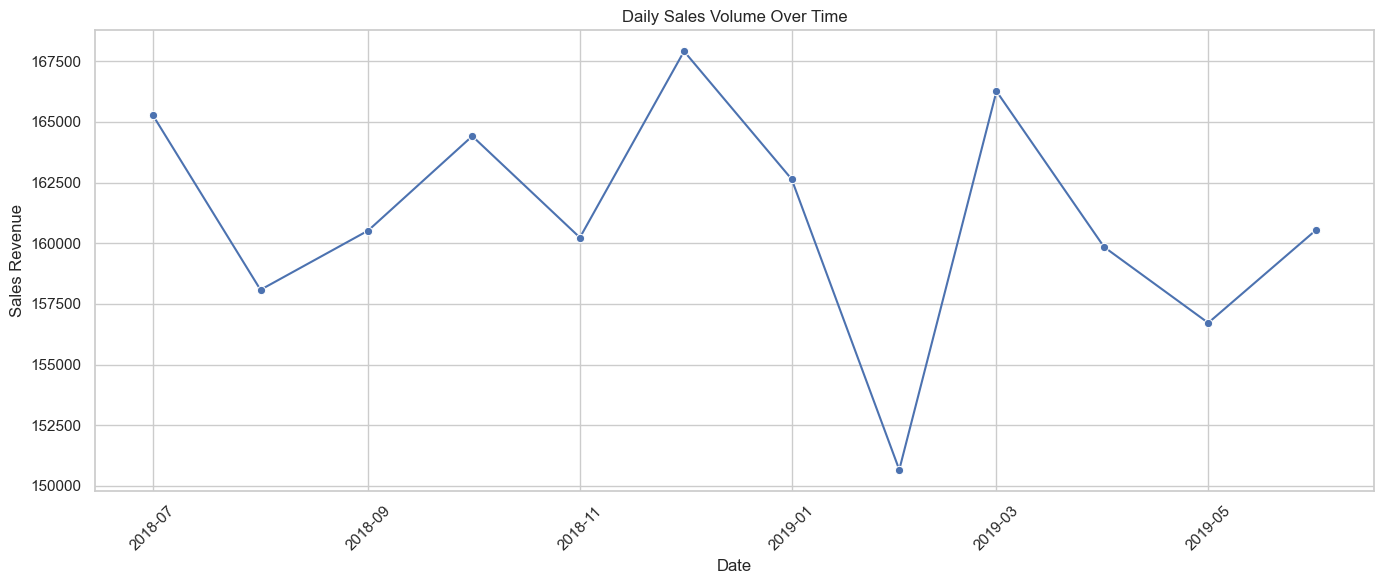

In [221]:
# Step 1: Aggregate sales volume by day
daily_volume = overview.groupby('time').agg({
    'revenue': 'sum'
}).reset_index()

# Step 2: Plot daily sales volume over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_volume, x='time', y='revenue', marker='o')
plt.title("Daily Sales Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

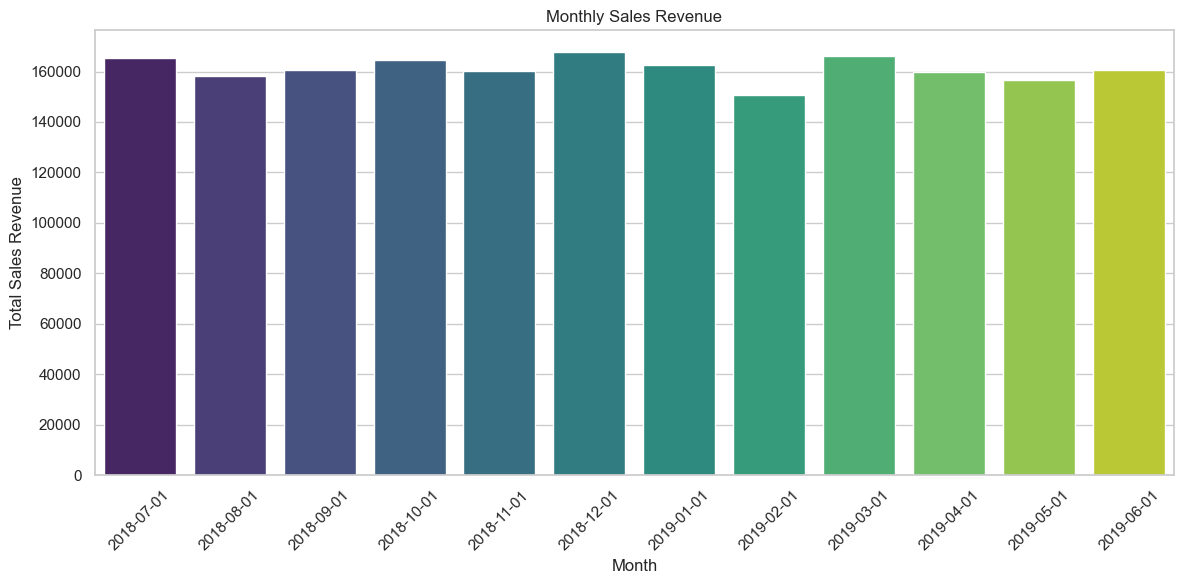

In [222]:
# Step 1: Aggregate the volume by month
monthly_volume = overview.groupby('time')['revenue'].sum().reset_index()

# Step 2: Plot the bar graph for sales volume over time
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_volume, x='time', y='revenue', palette='viridis',hue='time')


plt.title("Monthly Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()


plt.show()

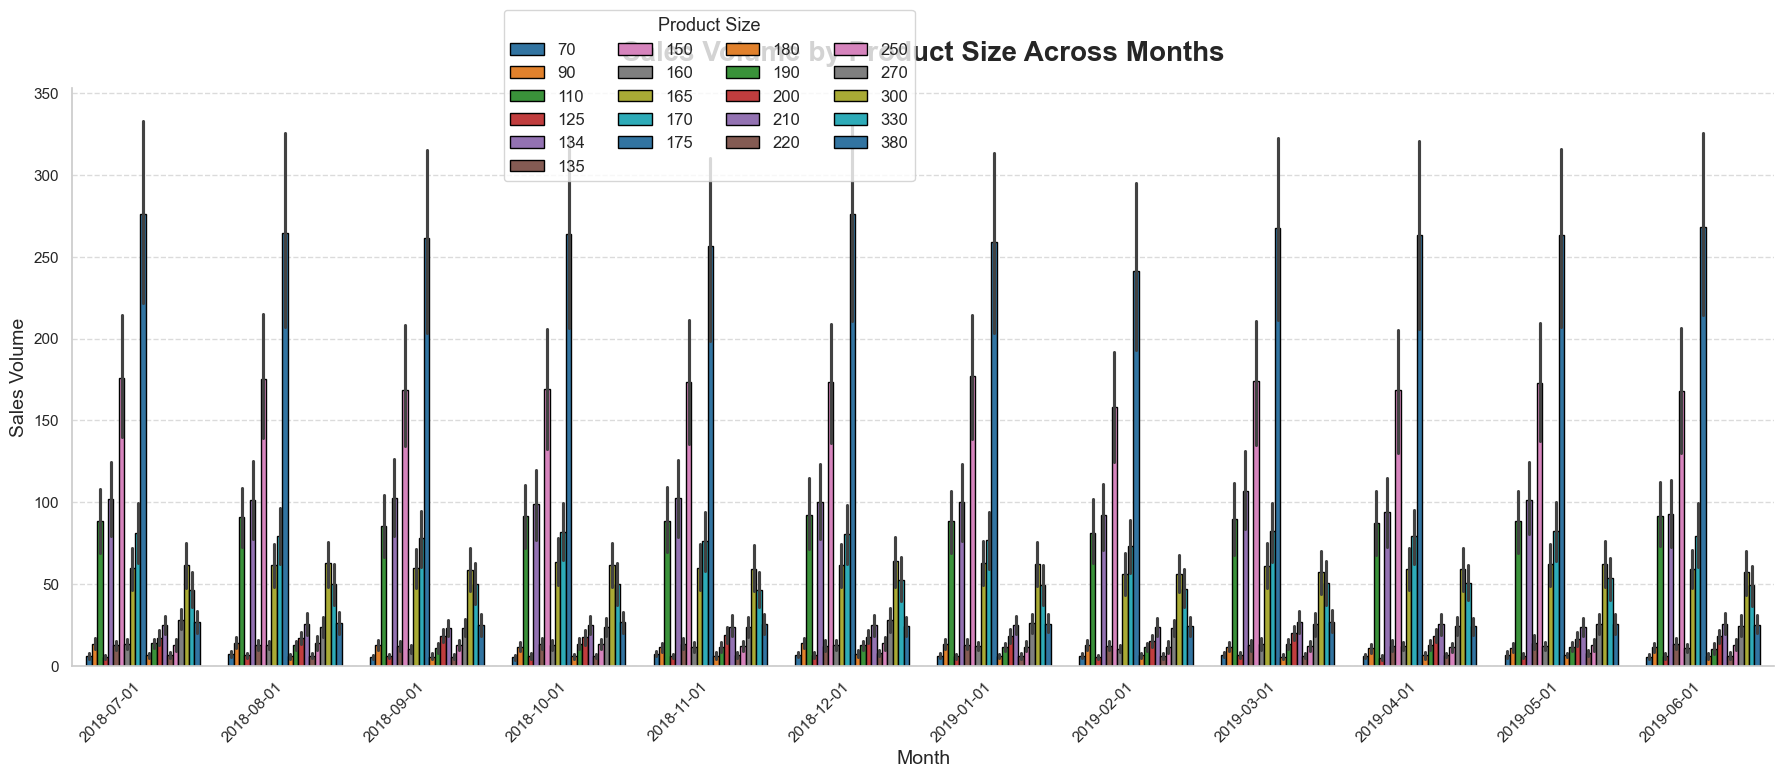

In [223]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 8))

sns.barplot(
    data=overview,
    x='time',
    y='volume',
    hue='size',
    palette='tab10',   # high-contrast, professional palette
    edgecolor='black'
)


plt.title("Sales Volume by Product Size Across Months", fontsize=20, weight='bold', pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Sales Volume", fontsize=14)


plt.xticks(rotation=45, ha='right')

plt.legend(
    title="Product Size",
    title_fontsize=13,
    fontsize=12,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.15),
    ncol=4,
    frameon=True
)

# Enhance grid and overall aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()

plt.show()


In [224]:
con.query("""Select premium_customer,lifestage,size,
            Round(sum(tot_sales),2) as revenue,
            count(txn_id) as volume,
            Date_TRUNC('month',date) as time
            from tr
            group by Date_TRUNC('month',date),premium_customer,lifestage,size""")


┌──────────────────┬────────────────┬───────┬─────────┬────────┬────────────┐
│ premium_customer │   lifestage    │ size  │ revenue │ volume │    time    │
│     varchar      │    varchar     │ int32 │ double  │ int64  │    date    │
├──────────────────┼────────────────┼───────┼─────────┼────────┼────────────┤
│ Budget           │ YOUNG FAMILIES │   110 │   638.4 │     86 │ 2018-10-01 │
│ Budget           │ YOUNG FAMILIES │   300 │   688.4 │     89 │ 2018-07-01 │
│ Budget           │ YOUNG FAMILIES │   175 │  2776.7 │    379 │ 2019-03-01 │
│ Budget           │ YOUNG FAMILIES │   175 │  3029.7 │    429 │ 2019-01-01 │
│ Budget           │ YOUNG FAMILIES │   134 │   880.6 │    120 │ 2019-06-01 │
│ Budget           │ YOUNG FAMILIES │   175 │  3023.7 │    417 │ 2018-12-01 │
│ Budget           │ YOUNG FAMILIES │   150 │  1748.5 │    259 │ 2018-08-01 │
│ Budget           │ YOUNG FAMILIES │   134 │  1113.7 │    153 │ 2018-09-01 │
│ Budget           │ YOUNG FAMILIES │   110 │  1090.6 │    149 │

In [225]:
query = con.query("""
SELECT 
    premium_customer, 
    lifestage, 
    size,
    ROUND(SUM(tot_sales), 2) AS revenue,
    COUNT(txn_id) AS volume,
    DATE_TRUNC('month', date) AS time
FROM tr
GROUP BY DATE_TRUNC('month', date), premium_customer, lifestage, size
ORDER BY time, size;
""").df()

query.head()

,premium_customer,lifestage,size,revenue,volume,time
0,Budget,YOUNG SINGLES/COUPLES,70,12.0,3,2018-07-01
1,Premium,YOUNG SINGLES/COUPLES,70,9.6,2,2018-07-01
2,Premium,RETIREES,70,19.2,4,2018-07-01
3,Mainstream,MIDAGE SINGLES/COUPLES,70,24.0,5,2018-07-01
4,Budget,RETIREES,70,26.4,6,2018-07-01


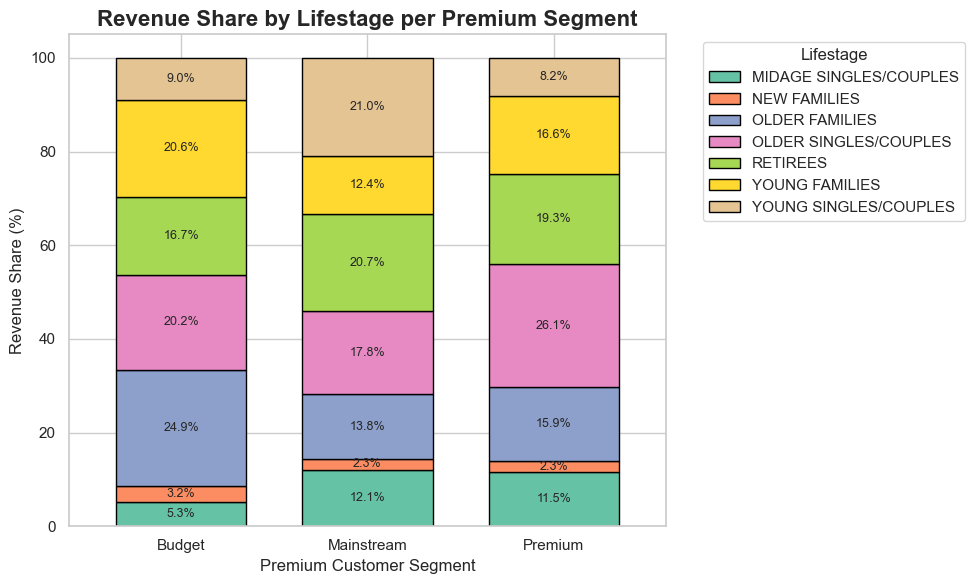

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Step 0: Drop any existing 'total_revenue' column to avoid merge conflicts
# -------------------------------
if 'total_revenue' in contribution_per_segment.columns:
    contribution_per_segment = contribution_per_segment.drop(columns=['total_revenue'])

# -------------------------------
# Step 1: Compute total revenue per segment
# -------------------------------
segment_totals = contribution_per_segment.groupby('premium_customer', as_index=False)['revenue'].sum()
segment_totals.rename(columns={'revenue': 'total_revenue'}, inplace=True)

# Merge safely
contribution_per_segment = contribution_per_segment.merge(segment_totals, on='premium_customer', how='left')

# -------------------------------
# Step 2: Calculate revenue share per segment
# -------------------------------
contribution_per_segment['revenue_share'] = (
    contribution_per_segment['revenue'] / contribution_per_segment['total_revenue'] * 100
)

# -------------------------------
# Step 3: Pivot data for plotting
# -------------------------------
pivot_data = contribution_per_segment.pivot_table(
    index='premium_customer', columns='lifestage', values='revenue_share', aggfunc='sum'
).fillna(0)

# -------------------------------
# Step 4: Set professional color palette
# -------------------------------
palette = sns.color_palette("Set2", n_colors=len(pivot_data.columns))

# -------------------------------
# Step 5: Plot stacked bar chart
# -------------------------------
ax = pivot_data.plot(
    kind='bar', stacked=True, figsize=(10,6), width=0.7, color=palette, edgecolor='black'
)

# Add value labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)

# -------------------------------
# Step 6: Labels and title
# -------------------------------
plt.title("Revenue Share by Lifestage per Premium Segment", fontsize=16, fontweight='bold')
plt.xlabel("Premium Customer Segment", fontsize=12)
plt.ylabel("Revenue Share (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


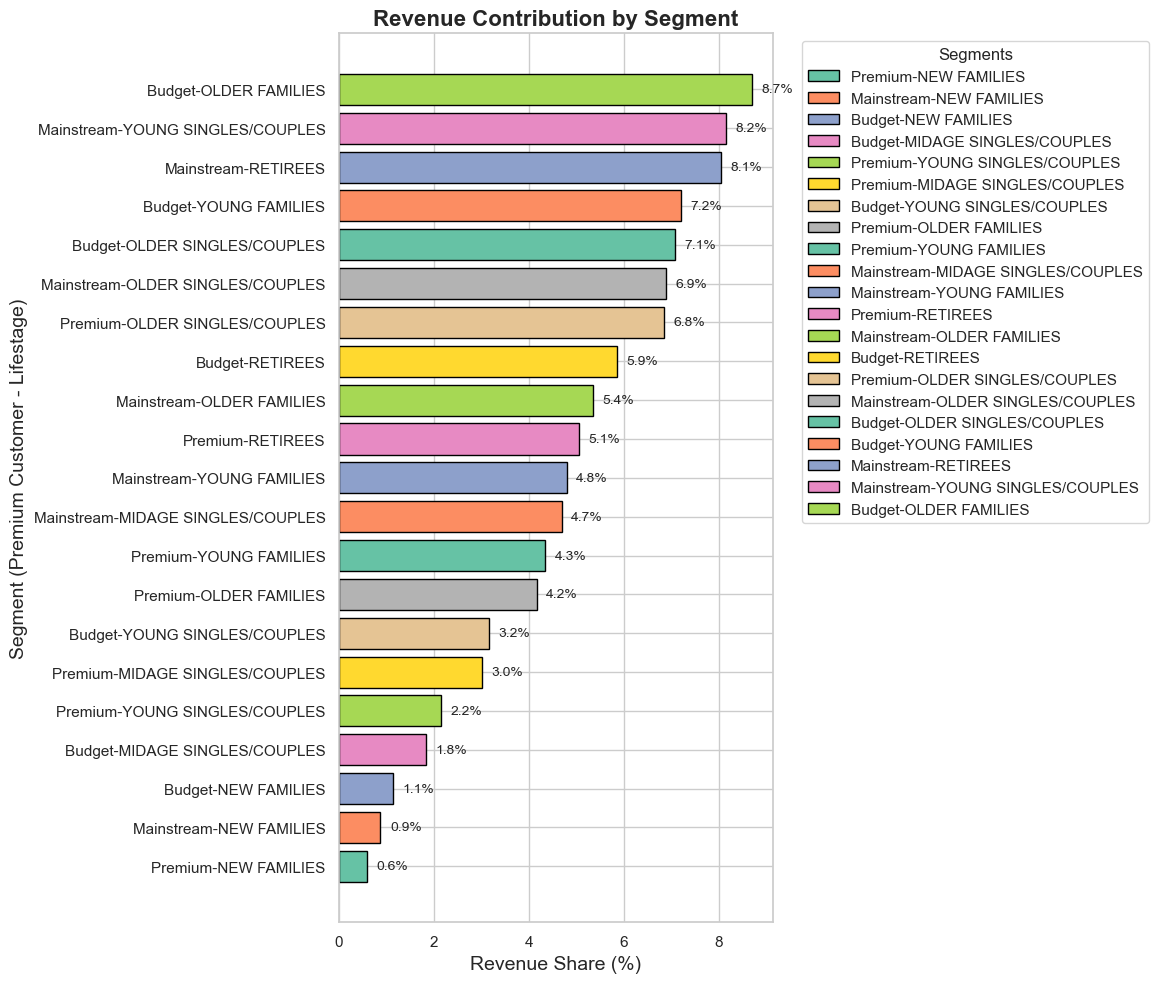

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Create combined segment label
# -------------------------------
overview['segment_label'] = overview['premium_customer'] + '-' + overview['lifestage']

# Aggregate revenue per combined segment
segment_revenue = overview.groupby('segment_label', as_index=False)['revenue'].sum()

# Compute total revenue
total_revenue = segment_revenue['revenue'].sum()

# Calculate revenue share (%)
segment_revenue['revenue_share'] = segment_revenue['revenue'] / total_revenue * 100

# Sort by revenue share descending
segment_revenue = segment_revenue.sort_values(by='revenue_share', ascending=True)  # ascending=True for horizontal bar

# -------------------------------
# Step 2: Plot horizontal bar chart
# -------------------------------
plt.figure(figsize=(12, 10))  # Increase figure size
palette = sns.color_palette("Set2", n_colors=len(segment_revenue))

# Horizontal bar chart
bars = plt.barh(
    segment_revenue['segment_label'],
    segment_revenue['revenue_share'],
    color=palette,
    edgecolor='black'
)

# Add percentage labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}%", va='center', fontsize=10)

# Labels and title
plt.xlabel("Revenue Share (%)", fontsize=14)
plt.ylabel("Segment (Premium Customer - Lifestage)", fontsize=14)
plt.title("Revenue Contribution by Segment", fontsize=16, fontweight='bold')

# Legend
plt.legend(bars, segment_revenue['segment_label'], title="Segments", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [228]:
overview.head()

,premium_customer,lifestage,size,revenue,volume,time,segment_label
0,Mainstream,OLDER SINGLES/COUPLES,70,38.4,9,2018-07-01,Mainstream-OLDER SINGLES/COUPLES
1,Mainstream,NEW FAMILIES,70,4.8,1,2018-07-01,Mainstream-NEW FAMILIES
2,Mainstream,MIDAGE SINGLES/COUPLES,70,24.0,5,2018-07-01,Mainstream-MIDAGE SINGLES/COUPLES
3,Mainstream,RETIREES,70,52.8,11,2018-07-01,Mainstream-RETIREES
4,Premium,MIDAGE SINGLES/COUPLES,70,12.0,3,2018-07-01,Premium-MIDAGE SINGLES/COUPLES


In [229]:
import plotly.express as px
import pandas as pd

# Step 1: Query summarized data including total_sales and packet size
segment_performance = con.query("""
    SELECT
        premium_customer,
        lifestage,
        size,
        time,
        SUM(revenue) AS total_sales
    FROM overview
    GROUP BY premium_customer, lifestage, size, time
""").df()

# Step 2: Combine customer type and lifestage into a single 'segment' column
segment_performance['segment'] = (
    segment_performance['premium_customer'] + ' - ' + segment_performance['lifestage']
)

# Step 3: Ensure consistent size ordering (include all known packet sizes)
size_order = [70, 90, 110, 125, 134, 135, 150, 160, 165, 170, 175, 
              180, 190, 200, 210, 220, 250, 270, 300, 330, 380]

segment_performance['size'] = pd.Categorical(
    segment_performance['size'], 
    categories=size_order, 
    ordered=True
)

# Step 4: Create a heatmap showing total_sales across segments and packet size
fig = px.density_heatmap(
    segment_performance,
    x='size',
    y='segment',
    z='total_sales',
    color_continuous_scale='Viridis',
    title='Total Sales Distribution by Customer Segment and Packet Size',
)

# Step 5: Improve layout for readability
fig.update_layout(
    height=850,
    width=1250,
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis_title='Packet Size (g)',
    yaxis_title='Customer Segment',
    margin=dict(l=80, r=80, t=100, b=80)
)

# Step 6: Adjust x-axis labeling and ordering
fig.update_xaxes(
    categoryorder='array',
    categoryarray=size_order,
    tickangle=-45
)

fig.show()

🧾 Sales & Customer Segment Analysis Summary
📈 Revenue Trends Overview

Both the line graph and bar chart reveal the overall sales revenue trends across time:

Consistent Monthly Sales: Sales remain relatively stable between July 2018 and June 2019, showing only mild fluctuations.

Revenue Peaks: Noticeable increases around December 2018 and March 2019, which likely correspond to holiday and post-holiday purchase surges.

Revenue Dips: Minor declines around February and May 2019, possibly due to post-holiday slowdowns or seasonal demand shifts.

🔍 Interpretation:

The line graph effectively captures sales volatility and cyclical patterns, making it ideal for identifying seasonal performance peaks.

The bar chart provides a clear comparative view of month-to-month revenue distribution, showing that the business maintains steady revenue generation with minor seasonality.

Strategic Implication:
Plan inventory and promotional campaigns around the end-of-year and early-year peaks. These periods show higher responsiveness to marketing efforts, especially for mainstream and premium buyers.

🟩 Product Size Trends (Heatmap Insights)

The heatmap drills deeper into how packet size influences total sales across customer segments.

Key Observations:

150g and 175g packets dominate sales across nearly all customer segments.

Medium-size packets form the core demand range—affordable, shareable, and suitable for daily consumption.

Larger packets (250g–380g) perform strongly among:

Budget Older Families — bulk purchasing behavior.

Premium Older Singles/Couples — value-driven and quality-focused preferences.

Strategic Implication:
Maintain robust stock levels and marketing support for 150g–175g sizes. Align promotions around value, convenience, and quality themes per segment.

🧍‍♂️ Segment-Specific Insights
Segment	Core Lifestages	Behavior	Promotion Type	Key Message
Budget	Older Families, Older Singles/Couples	Price-sensitive, loyal	Value packs, discounts	“Save more – family size value.”
Mainstream	Young Singles/Couples, Young Families	Dynamic, lifestyle-driven	Multi-buy, loyalty rewards	“Everyday fun – share the moment.”
Premium	Older Singles/Couples, Young Families	Loyal, quality-conscious	Premium branding, limited editions	“Crafted taste – superior quality.”
🎯 Priority Target Segments

Primary Focus: Mainstream Young Singles/Couples
→ Largest and most responsive group with higher per-packet spend.
→ Leverage lifestyle-driven campaigns and digital engagement.

Secondary Focus: Premium Young Families
→ Stable, quality-driven, and ideal for sustained premium-tier campaigns.
→ Highlight artisanal, health-conscious, or limited-edition product lines.

💡 Integrated Interpretation Summary
Analytical View	Purpose	Key Insight
Line Graph	Trend tracking over time	Seasonal peaks around Dec–Mar; overall revenue stability
Bar Chart	Monthly comparison	Smooth revenue distribution with minor dips
Heatmap	Customer × Product Size interaction	Medium packet sizes dominate across most segments
Combined Insight	Business decision foundation	Focus on maintaining product consistency, targeted marketing, and seasonal readiness